<a href="https://colab.research.google.com/github/ubsuny/CompPhys/blob/Colab/DataAnalysis/FFT/CP1_23_CO2notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
plt.rcParams['font.size'] = 14

In [ ]:
df = pd.read_csv(
    'https://gml.noaa.gov/aftp/data/trace_gases/co2/flask/surface/txt/co2_mlo_surface-flask_1_ccgg_month.txt',
    delimiter="\s+",skiprows=54, names=['site',	'year',	'month',	'value'])

In [ ]:
df['date'] = pd.to_datetime(df[['year','month']].assign(day=1)).dt.to_period('M')

In [ ]:
df = df.set_index('date')

In [ ]:
df['months'] = [x.n for x in (df.index-df.index[0])]

In [ ]:
df

,site,year,month,value,months
date,,,,,
1969-08,MLO,1969,8,322.51,0
1969-09,MLO,1969,9,321.36,1
1969-10,MLO,1969,10,320.74,2
1969-11,MLO,1969,11,321.98,3
1969-12,MLO,1969,12,323.77,4
...,...,...,...,...,...
2022-08,MLO,2022,8,416.92,636
2022-09,MLO,2022,9,415.57,637
2022-10,MLO,2022,10,415.56,638


<Axes: xlabel='date'>

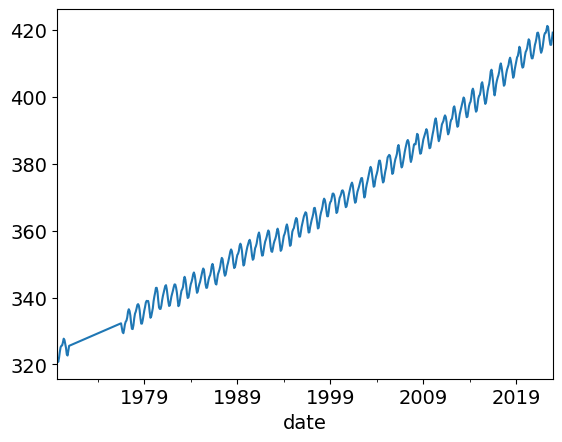

In [ ]:
df['value'].plot()

In [ ]:
def discrete_transform(data):
    """Return Discrete Fourier Transform (DFT) of a complex data vector"""
    N = len(data)
    transform = np.zeros(N)
    for k in range(N):
        for j in range(N):
            angle = 2 * np.pi * k * j / N
            transform[k] += data[j] * np.exp(1j * angle)
    return transform

def fft(x):
    N = len(x)
    if N <= 1: return x
    elif N % 2 == 1:         # N is odd, lemma does not apply
        print ('N is ' + str(N) + ', fall back to discrete transform')
        return discrete_transform(x)
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    return np.array( [even[k] + np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)] + \
                     [even[k] - np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)] )



In [ ]:
X= fft(df['value'][-512:])

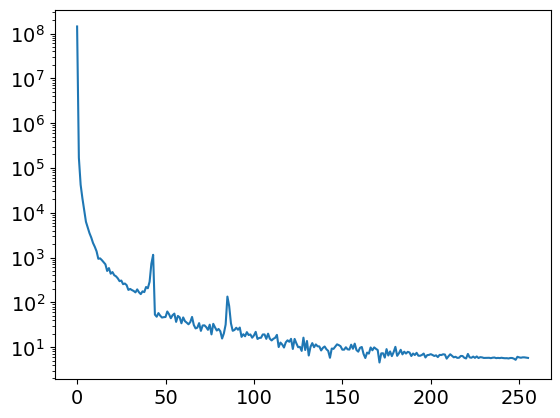

In [ ]:
plt.plot(np.abs(X[:int(len(X)/2)])**2/int(len(X)/2))
plt.yscale("log")
#plt.xlim(0,50)

In [ ]:
Heavyside = np.append(np.zeros_like(X[:50]), np.ones_like(X[50:]))

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


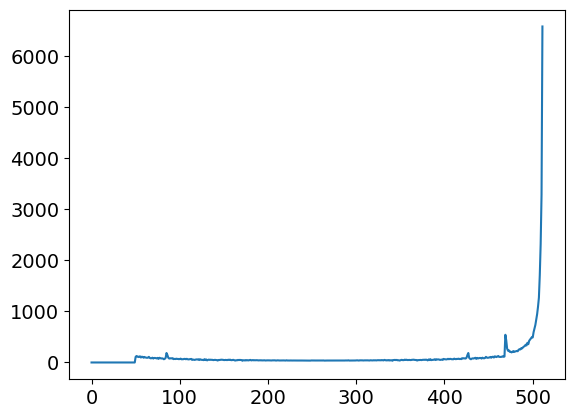

In [ ]:
plt.plot(Heavyside*np.abs(X))

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


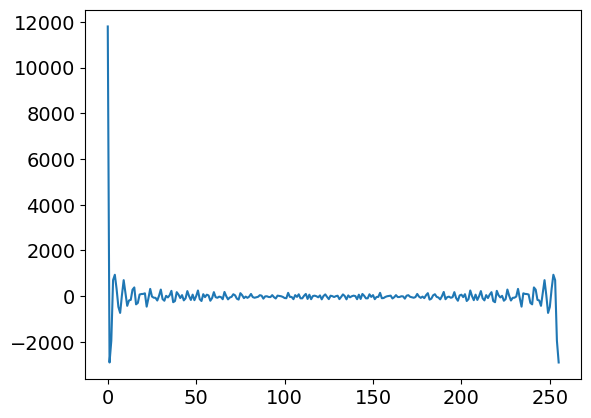

In [ ]:
plt.plot(fft(Heavyside[:256]*np.abs(X[:256])))